# CSCE 633 600 (Machine Learning) Homework 4
## Name: Rohan Chaudhury
## UIN: 432001358


### Question: Predicting one's hirability based on their job interview

Communication skills are essential for successfully entering the workforce. A particularly important communication skill is the ability to connect the job role requirements with one's professional or personal experience, which is commonly asked during job interviews.

The goal of this problem is to predict one's job hirability based on their physiological responses
and vocal measures during the interview. We have collected data from 13 participants during a
job interview with an industry representative, located inside "Homework 4" folder on CANVAS
("data.csv"). The rows of the file refer to the samples of the dataset, where each interviewee
participant corresponds to one sample. The columns denote the participant ID (column 1),
participant's physiological and vocal measures (columns 2-9), and the outcome variable (column
10), as described below:

1. PID: interviewee ID

2. SCL: skin conductance level measured as a proxy of the amount of sweat elicited from the body (measure of physiological reactivity)

3. SCRAmp: average amplitude of skin conductance responses (measure of physiological reactivity)

4. SCRfreq: average number of skin conductance responses (measure of physiological reactivity)

5. HRmean: average heart rate (measure of physiological reactivity)

6. ACCmean: average wrist acceleration

7. Energy: energy of the speech signal (measure of voice loudness)

8. ZCR: speech zero-crossing rate (proxy measure of speech rate)

9. VoiceProb: voicing probability of speech (measure of speech quality)

10. Hirability: hirability score assigned by the interviewer (1-5 scale; 1: low; 5: high)

### (1) (2 points) Feature exploration: Compute the Pearson's correlation between each feature and the hirability score (i.e., 8 correlations in total). Which features appear to be the most predictive of the outcome? Please comment on the sign (i.e., positive/negative) of the correlation values.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import graphviz

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor

In [2]:
file_train="data.csv"

train_rows =pd.read_csv(file_train)

print (train_rows.head())
print (" ")
print("Total no. of rows in data.csv: %d \n"%(len(train_rows)))
print (" ")
print("Total no. of colums in data.csv: %d \n"%(train_rows.shape[1]))

  PID       SCL    SCRamp   SCRfreq      HRmean    ACCmean    Energy  \
0  P1  0.827077  0.094424  2.898792   73.276206  66.491987  0.005447   
1  P2  5.183890  0.244549  5.219806  102.502828  65.031908  0.005782   
2  P3  0.023257       NaN  0.000000   90.603827  64.658708  0.006265   
3  P4  0.211715  0.008790  2.299042   80.258785  65.260810  0.006127   
4  P5  0.082192  0.011505  1.299459   71.348170  66.607203  0.005081   

        ZCR  VoiceProb  Hirability  
0  0.120261   0.403078           4  
1  0.074726   0.457309           5  
2  0.098657   0.427495           5  
3  0.091186   0.437544           3  
4  0.076909   0.374498           4  
 
Total no. of rows in data.csv: 13 

 
Total no. of colums in data.csv: 10 



In [3]:
for i in range(1,train_rows.shape[1]-1):
    correlation=train_rows.iloc[:,[i,-1]].corr(method='pearson')
    print ("Pearson's correlation coefficient between {} and {} is : {}".format(train_rows.columns[-1], train_rows.columns[i], correlation.iloc[0,1]))

Pearson's correlation coefficient between Hirability and SCL is : -0.05021625845476406
Pearson's correlation coefficient between Hirability and SCRamp is : 0.25910061151032837
Pearson's correlation coefficient between Hirability and SCRfreq is : -0.28007354950846525
Pearson's correlation coefficient between Hirability and HRmean is : 0.08944574167632677
Pearson's correlation coefficient between Hirability and ACCmean is : 0.02948404711128631
Pearson's correlation coefficient between Hirability and Energy is : 0.4768001512064216
Pearson's correlation coefficient between Hirability and ZCR is : -0.0492520278990791
Pearson's correlation coefficient between Hirability and VoiceProb is : 0.2872210071588297


### Answer: The Pearson's correlation between each feature and the hirability score is as follows:

Pearson's correlation coefficient between Hirability and SCL is : -0.05021625845476406

Pearson's correlation coefficient between Hirability and SCRamp is : 0.25910061151032837

Pearson's correlation coefficient between Hirability and SCRfreq is : -0.28007354950846525

Pearson's correlation coefficient between Hirability and HRmean is : 0.08944574167632677

Pearson's correlation coefficient between Hirability and ACCmean is : 0.02948404711128631

Pearson's correlation coefficient between Hirability and Energy is : 0.4768001512064216

Pearson's correlation coefficient between Hirability and ZCR is : -0.0492520278990791

Pearson's correlation coefficient between Hirability and VoiceProb is : 0.2872210071588297


The feature **Energy** with Pearson's correlation coefficient value of 0.47 appears to be the most predictive of the outcome value Hirability.


Features having positive Pearson's correlation coefficient with Hirability:

1. SCRamp

2. HRmean

3. ACCmean

4. Energy

5. VoiceProb

Features having negative Pearson's correlation coefficient with Hirability:

1. SCL

2. SCRfreq

3. ZCR


In statistics, the Pearson correlation coefficient is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations and the result always has a value between −1 and 1.


**A positive Pearson's correlation coefficient between two variables indicates a positive association between them; that is, as the value of one variable increases, so does the value of the other variable.**

**A negative Pearson's correlation coefficient between two variables indicates a negative association between them; that is, as the value of one variable increases, the value of the other variable decreases.**

### (2) (3 points) Decision tree modeling: Use a decision tree to estimate each interviewee's hirability score based on their physiological and vocal measures. Use a leave-one-sample-out cross-validation (i.e., equivalent to leave-one-participant-out in this case), according to which you will have as many folds as the number of samples (i.e., participants). In each fold, you will use one participant as the test and the rest for training the decision tree. Please collect the estimated hirability score on the test sample from each fold. After all folds are done, please report the average absolute error across all participants (i.e., by taking the estimated hirability value of the test participant from each fold). Experiment with various hyper-parameters (e.g., tree depth) and feature combinations.

In [4]:
# feature_set_1=["SCL","SCRamp","SCRfreq","HRmean","ACCmean","Energy","ZCR","VoiceProb"]
# X_matrix_1=train_rows.loc[:,feature_set_1]
# X_matrix_1=X_matrix_1.to_numpy()
# Y_matrix_1=train_rows.loc[:,"Hirability"]
# Y_matrix_1=Y_matrix_1.to_numpy()


def decision_tree(X_train,Y_train, tree_depth=None, plot_tree=False, criterion="mae", splitter="best", feature_set=None):
    if criterion=="squared_error":
        if tree_depth:
            clf = tree.DecisionTreeRegressor(max_depth=tree_depth, random_state=2, splitter=splitter)
        else:    
            clf = tree.DecisionTreeRegressor(random_state=2, splitter=splitter)
    else:
        if tree_depth:
            clf = tree.DecisionTreeRegressor(max_depth=tree_depth, random_state=2, criterion=criterion, splitter=splitter)
        else:    
            clf = tree.DecisionTreeRegressor(random_state=2, criterion=criterion, splitter=splitter)
    clf = clf.fit(X_train,Y_train)
    if plot_tree:
        tree.plot_tree(clf,feature_names = feature_set, 
               class_names=['1','2','3','4','5'],
               rounded=True, 
               filled = True)
    return clf



def get_score_dt(train_rows, feature_set=["SCL","SCRamp","SCRfreq","HRmean","ACCmean","Energy","ZCR","VoiceProb"], 
                 tree_depth=None, print_hirability=False, print_avg_score=True, criterion="mae", splitter="best"):
    X_matrix=train_rows.loc[:,feature_set]
    X_matrix=X_matrix.to_numpy()
    Y_matrix=train_rows.loc[:,"Hirability"]
    Y_matrix=Y_matrix.to_numpy()
    X_matrix = np.nan_to_num(X_matrix)
    scores=[]
    abs_err=[]
#     print (X_matrix)
    for i in range(0, len(Y_matrix)):
        if (i!=0):
            X_train=np.concatenate((X_matrix[:i],X_matrix[i+1:]))
            Y_train=np.concatenate((Y_matrix[:i],Y_matrix[i+1:]))
            X_test=X_matrix[i:i+1]
            Y_test=Y_matrix[i:i+1]
        else:
            X_train=X_matrix[1:]
            Y_train=Y_matrix[1:]
            X_test=X_matrix[:1]
            Y_test=Y_matrix[:1]
        
        
        
#         print (X_train)

        clf=decision_tree(X_train,Y_train,tree_depth=tree_depth, criterion=criterion, splitter=splitter, feature_set=feature_set)
#         trees.append(clf)
        pred=clf.predict(X_test)
        if print_hirability:
            print ("Predicted Hirability score using Decision Tree for sample P{} (test data in this fold) with original hirability score of {} is: {}".format(i+1, Y_test, pred))
        scores.append(pred)
        abs_err.append(abs(pred-Y_test))
    
    avg_abs_err=sum(abs_err)/len(abs_err)
    
    if print_avg_score:
        print (" ")
        if tree_depth:
            print ("Average absolute error across all participants using Decision Tree with maximum tree depth of {}, criterion as \"{}\", splitter as \"{}\", and features in the training set as {} is: {}".format(tree_depth,criterion, splitter,feature_set,avg_abs_err))

        else:
            print ("Average absolute error across all participants using Decision Tree with no limit on tree depth, criterion as \"{}\", splitter as \"{}\", and features in the training set as {} is: {}".format(criterion, splitter,feature_set,avg_abs_err))
        print (" ")
    return avg_abs_err
        
# trees=[]
print ("Printing hirability scores for 1 hyperparameter and feature combination:")
print (" ")
get_score_dt(train_rows, print_hirability=True)


Printing hirability scores for 1 hyperparameter and feature combination:
 
Predicted Hirability score using Decision Tree for sample P1 (test data in this fold) with original hirability score of [4] is: [3.]
Predicted Hirability score using Decision Tree for sample P2 (test data in this fold) with original hirability score of [5] is: [5.]
Predicted Hirability score using Decision Tree for sample P3 (test data in this fold) with original hirability score of [5] is: [3.]
Predicted Hirability score using Decision Tree for sample P4 (test data in this fold) with original hirability score of [3] is: [5.]
Predicted Hirability score using Decision Tree for sample P5 (test data in this fold) with original hirability score of [4] is: [3.]
Predicted Hirability score using Decision Tree for sample P6 (test data in this fold) with original hirability score of [4] is: [4.]
Predicted Hirability score using Decision Tree for sample P7 (test data in this fold) with original hirability score of [5] is:

array([1.07692308])

### Answer: The estimated hirability score on the test sample from 1 hyperparameter combination is printed above.

In [5]:
print ("Printing only Average Absolute error for the rest of the hyperparameter and feature combinations of the Decision Tree:")
print (" ")

hyperparams=[(None,["SCRamp","SCRfreq","Energy","VoiceProb"], "friedman_mse", "best"),
             (None,["Energy"], "friedman_mse", "best"),(2,["Energy","VoiceProb"],"friedman_mse", "best"),
             (2,["SCRamp","SCRfreq","Energy","VoiceProb"],"friedman_mse", "random"),
             (3,["SCL","SCRamp","SCRfreq","HRmean","ACCmean","Energy","ZCR","VoiceProb"],"mse", "random"),
             (4,["SCRamp","SCRfreq","Energy","VoiceProb"],"friedman_mse", "best"),(5,["Energy"],"mse", "best"),
            (None,["SCRamp","SCRfreq","Energy","VoiceProb"], "mae", "random"),
             (None,["Energy"], "mae", "random"),(2,["Energy","VoiceProb"], "mae", "best"),
             (2,["SCRamp","SCRfreq","Energy","VoiceProb"], "mse", "best"),
             (3,["SCL","SCRamp","SCRfreq","HRmean","ACCmean","Energy","ZCR","VoiceProb"], "mae", "best"),
             (4,["SCRamp","SCRfreq","Energy","VoiceProb"],"mse", "random"),(5,["Energy"], "mae", "random")]


avg_scores=[]
# trees=[]
for hyp in hyperparams:
#     print (hyp[1],hyp[0])
    avg_score=get_score_dt(train_rows, feature_set=hyp[1], tree_depth=hyp[0], criterion=hyp[2], splitter=hyp[3])
    avg_scores.append(avg_score)

Printing only Average Absolute error for the rest of the hyperparameter and feature combinations of the Decision Tree:
 
 
Average absolute error across all participants using Decision Tree with no limit on tree depth, criterion as "friedman_mse", splitter as "best", and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.84615385]
 
 
Average absolute error across all participants using Decision Tree with no limit on tree depth, criterion as "friedman_mse", splitter as "best", and features in the training set as ['Energy'] is: [1.]
 
 
Average absolute error across all participants using Decision Tree with maximum tree depth of 2, criterion as "friedman_mse", splitter as "best", and features in the training set as ['Energy', 'VoiceProb'] is: [0.71611722]
 
 
Average absolute error across all participants using Decision Tree with maximum tree depth of 2, criterion as "friedman_mse", splitter as "random", and features in the training set as ['SCRamp', 'SC

### Answer: After all folds are done, the average absolute error across all participants is calculated for various hyper-parameters and feature combinations of the Decision Trees and shown below:

1. Average absolute error across all participants using Decision Tree with no limit on tree depth, criterion as "friedman_mse", splitter as "best", and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.84615385]
 
 
2. Average absolute error across all participants using Decision Tree with no limit on tree depth, criterion as "friedman_mse", splitter as "best", and features in the training set as ['Energy'] is: [1.]
 
 
3. Average absolute error across all participants using Decision Tree with maximum tree depth of 2, criterion as "friedman_mse", splitter as "best", and features in the training set as ['Energy', 'VoiceProb'] is: [0.71611722]
 
 
4. Average absolute error across all participants using Decision Tree with maximum tree depth of 2, criterion as "friedman_mse", splitter as "random", and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.74615385]
 
 
5. Average absolute error across all participants using Decision Tree with maximum tree depth of 3, criterion as "mse", splitter as "random", and features in the training set as ['SCL', 'SCRamp', 'SCRfreq', 'HRmean', 'ACCmean', 'Energy', 'ZCR', 'VoiceProb'] is: [0.94059829]
 
 
6. Average absolute error across all participants using Decision Tree with maximum tree depth of 4, criterion as "friedman_mse", splitter as "best", and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.88717949]
 
 
7. Average absolute error across all participants using Decision Tree with maximum tree depth of 5, criterion as "mse", splitter as "best", and features in the training set as ['Energy'] is: [0.94871795]
 
 
8. Average absolute error across all participants using Decision Tree with no limit on tree depth, criterion as "mae", splitter as "random", and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.92307692]
 
 
9. Average absolute error across all participants using Decision Tree with no limit on tree depth, criterion as "mae", splitter as "random", and features in the training set as ['Energy'] is: [1.15384615]
 
 
10. Average absolute error across all participants using Decision Tree with maximum tree depth of 2, criterion as "mae", splitter as "best", and features in the training set as ['Energy', 'VoiceProb'] is: [0.69230769]
 
 
11. Average absolute error across all participants using Decision Tree with maximum tree depth of 2, criterion as "mse", splitter as "best", and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.9787851]
 
 
12. Average absolute error across all participants using Decision Tree with maximum tree depth of 3, criterion as "mae", splitter as "best", and features in the training set as ['SCL', 'SCRamp', 'SCRfreq', 'HRmean', 'ACCmean', 'Energy', 'ZCR', 'VoiceProb'] is: [0.92307692]
 
 
13. Average absolute error across all participants using Decision Tree with maximum tree depth of 4, criterion as "mse", splitter as "random", and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.85714286]
 
 
14. Average absolute error across all participants using Decision Tree with maximum tree depth of 5, criterion as "mae", splitter as "random", and features in the training set as ['Energy'] is: [1.15384615]


## (3) (2 points) Decision tree visualization: Provide a plot of the root, nodes, and decisionboundaries of the best decision tree. Provide your intuition regarding the resulting model.

The best Decision tree with minimum average absolute error of [0.69230769] has maximum tree depth of 2, criterion as "mae", splitter as "best", and following features in the training set: ['Energy', 'VoiceProb']
 
Decision tree visualization for the best decision tree:
 


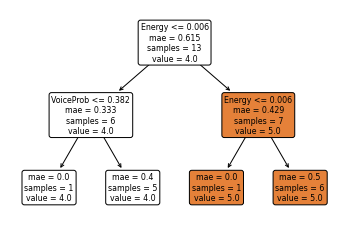

In [15]:
min_avg_error_idx=avg_scores.index(min(avg_scores))


print ("The best Decision tree with minimum average absolute error of {} has maximum tree depth of {}, criterion as \"{}\", splitter as \"{}\", and following features in the training set: {}".
       format(min(avg_scores),hyperparams[min_avg_error_idx][0],
              hyperparams[min_avg_error_idx][2],hyperparams[min_avg_error_idx][3],
              hyperparams[min_avg_error_idx][1]))
print (" ")
print ("Decision tree visualization for the best decision tree:")
print (" ")

X_matrix_opt=train_rows.loc[:,hyperparams[min_avg_error_idx][1]]
X_matrix_opt=X_matrix_opt.to_numpy()
Y_matrix_opt=train_rows.loc[:,"Hirability"]
Y_matrix_opt=Y_matrix_opt.to_numpy()
X_matrix_opt = np.nan_to_num(X_matrix_opt)


best_tree=decision_tree(X_matrix_opt,Y_matrix_opt, tree_depth=hyperparams[min_avg_error_idx][0], plot_tree=True, feature_set=hyperparams[min_avg_error_idx][1], criterion=hyperparams[min_avg_error_idx][2], splitter=hyperparams[min_avg_error_idx][3])



# tree.plot_tree(clf)

# dot_data = tree.export_graphviz(best_tree, out_file=None, 
#                       feature_names=hyperparams[min_avg_error_idx][1],  
#                       class_names=['1','2','3','4','5'],  
#                       filled=True, rounded=True,  
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph 

# from dtreeviz.trees import dtreeviz
# db=dtreeviz(best_tree, X_matrix_opt, Y_matrix_opt, target_name='Hirability', feature_names=hyperparams[min_avg_error_idx][1], scale=1.5)

# db

Text(0.5, 0.98, 'Pairwise decision boundary separation of the decision tree using paired features')

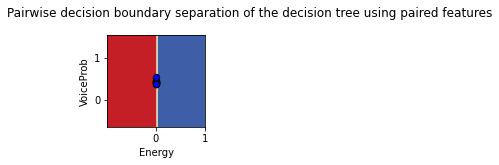

In [7]:
colors = "rgb"
step = 0.04
feature_combos=[['Energy','VoiceProb']]
for ix, pairs in enumerate(feature_combos):

    plt.subplot(2, 3, ix + 1)
    plt.xlabel(feature_combos[ix][0])
    plt.ylabel(feature_combos[ix][1])
    plt.tight_layout(h_pad=1, w_pad=1, pad=3) 

    X_matrix_1=train_rows.loc[:,pairs]
    X_matrix_1=X_matrix_1.to_numpy()
    Y_matrix_1=train_rows.loc[:,"Hirability"]
    Y_matrix_1=Y_matrix_1.to_numpy()
    X_matrix_1 = np.nan_to_num(X_matrix_1)
    
    
    
    clf = decision_tree(X_matrix_1,Y_matrix_1, tree_depth=hyperparams[min_avg_error_idx][0], plot_tree=False,
                        feature_set=hyperparams[min_avg_error_idx][1],
                        criterion=hyperparams[min_avg_error_idx][2], splitter=hyperparams[min_avg_error_idx][3])

   

    x_min, x_max = X_matrix_1[:, 0].min() - 1,  X_matrix_1[:, 0].max() + 1
    y_min, y_max = X_matrix_1[:, 1].min() - 1, X_matrix_1[:, 1].max() + 1
    
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step), 
        np.arange(y_min, y_max, step)
    )


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    
    for i, color in zip([3, 4, 5], colors):
        ix1 = np.where(Y_matrix_1 == i)
        plt.scatter(
             X_matrix_1[ix1, 0],
             X_matrix_1[ix1, 1],
            c=color,
            label=['1', '2', '3', '4', '5'],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=40,
        )

plt.suptitle("Pairwise decision boundary separation of the decision tree using paired features")

### Answer:

The best Decision tree with minimum average absolute error of [0.69230769] has maximum tree depth of 2, criterion as "mae", splitter as "best", and following features in the training set: ['Energy', 'VoiceProb']

The features ['Energy', 'VoiceProb'] has Pearson's correlation coefficient with Hirability as follows:

Pearson's correlation coefficient between Hirability and Energy is : 0.4768001512064216

Pearson's correlation coefficient between Hirability and VoiceProb is : 0.2872210071588297

These are the two highest absolute values of Pearson's correlation coefficient out of the 8 obtained from the 8 different features in the training dataset. Since the Pearson's correlation coefficient is more for these features therefore constructing a decision tree with these features gives the best decision trees.  Also limiting the maximum tree-depth to 2 prevents overfitting in this case. 

However, since we have very less training data so it is difficult to get a better Decision tree model that performs better on this data.




### (4) (3 points) Random forest: Repeat the same task as in question (2) using a random forest. Experiment with the optimal tree depth and number of trees. Compare and contrast the performance of the decision tree with the random forest.

In [8]:

def random_forest(X_train,Y_train, tree_depth=None, n_estimators=100):
    if tree_depth:
        clf = RandomForestRegressor(max_depth=tree_depth, random_state=0,n_estimators=n_estimators)
    else:    
        clf = RandomForestRegressor(random_state=0,n_estimators=n_estimators )
    clf = clf.fit(X_train,Y_train)
    return clf



def get_score_rf(train_rows, feature_set=["SCL","SCRamp","SCRfreq","HRmean","ACCmean","Energy","ZCR","VoiceProb"],
                 tree_depth=None, print_hirability=False, print_avg_score=True, n_estimators=100):
    X_matrix=train_rows.loc[:,feature_set]
    X_matrix=X_matrix.to_numpy()
    Y_matrix=train_rows.loc[:,"Hirability"]
    Y_matrix=Y_matrix.to_numpy()
    X_matrix = np.nan_to_num(X_matrix)
    scores=[]
    abs_err=[]
#     print (X_matrix)
    for i in range(0, len(Y_matrix)):
        if (i!=0):
            X_train=np.concatenate((X_matrix[:i],X_matrix[i+1:]))
            Y_train=np.concatenate((Y_matrix[:i],Y_matrix[i+1:]))
            X_test=X_matrix[i:i+1]
            Y_test=Y_matrix[i:i+1]
        else:
            X_train=X_matrix[1:]
            Y_train=Y_matrix[1:]
            X_test=X_matrix[:1]
            Y_test=Y_matrix[:1]
        
        
        
#         print (X_train)

        clf=random_forest(X_train,Y_train,tree_depth=tree_depth, n_estimators=n_estimators)
#         trees.append(clf)
        pred=clf.predict(X_test)
        if print_hirability:
            print ("Predicted Hirability score using Random Forest for sample P{} (test data in this fold) with original hirability score of {} is: {}".format(i+1, Y_test, pred))
        scores.append(pred)
        abs_err.append(abs(pred-Y_test))
    
    avg_abs_err=sum(abs_err)/len(abs_err)
    
    if print_avg_score:
        print (" ")
        if tree_depth:
            print ("Average absolute error across all participants using Random forest with maximum tree depth of {}, number of trees in the forest as {}, and features in the training set as {} is: {}".format(tree_depth,n_estimators,feature_set,avg_abs_err))

        else:
            print ("Average absolute error across all participants using Random forest with no limit on maximum tree depth, number of trees in the forest as {}, and features in the training set as {} is: {}".format(n_estimators,feature_set,avg_abs_err))
        print (" ")
    return avg_abs_err
        
# trees=[]
print ("Printing hirability scores for 1 hyperparameter and feature combination:")
print (" ")
get_score_rf(train_rows, print_hirability=True)


Printing hirability scores for 1 hyperparameter and feature combination:
 
Predicted Hirability score using Random Forest for sample P1 (test data in this fold) with original hirability score of [4] is: [4.4]
Predicted Hirability score using Random Forest for sample P2 (test data in this fold) with original hirability score of [5] is: [4.25]
Predicted Hirability score using Random Forest for sample P3 (test data in this fold) with original hirability score of [5] is: [4.32]
Predicted Hirability score using Random Forest for sample P4 (test data in this fold) with original hirability score of [3] is: [4.85]
Predicted Hirability score using Random Forest for sample P5 (test data in this fold) with original hirability score of [4] is: [4.03]
Predicted Hirability score using Random Forest for sample P6 (test data in this fold) with original hirability score of [4] is: [4.16]
Predicted Hirability score using Random Forest for sample P7 (test data in this fold) with original hirability score

array([0.72])

In [9]:
print ("Printing only Average Absolute error for the rest of the hyperparameter and feature combinations of the Random Forests:")
print (" ")

hyperparams_rf=[(None,["SCRamp","SCRfreq","Energy","VoiceProb"], 100),
             (None,["Energy"], 250),(2,["Energy","VoiceProb"],200),
             (2,["SCRamp","SCRfreq","Energy","VoiceProb"],150),
             (3,["SCL","SCRamp","SCRfreq","HRmean","ACCmean","Energy","ZCR","VoiceProb"],400),
             (4,["SCRamp","SCRfreq","Energy","VoiceProb"],350),(5,["Energy"],300),
            (None,["SCRamp","SCRfreq","Energy","VoiceProb"], 10),
             (None,["Energy"], 15),(2,["Energy","VoiceProb"], 20),
             (2,["SCRamp","SCRfreq","Energy","VoiceProb"], 30),
             (3,["SCL","SCRamp","SCRfreq","HRmean","ACCmean","Energy","ZCR","VoiceProb"], 40),
             (4,["SCRamp","SCRfreq","Energy","VoiceProb"],45),(5,["Energy"], 50)]


avg_scores_rf=[]
# trees=[]
for hyp1 in hyperparams_rf:
#     print (hyp[1],hyp[0])
    avg_score_rf=get_score_rf(train_rows, feature_set=hyp1[1], tree_depth=hyp1[0],n_estimators=hyp1[2])
    avg_scores_rf.append(avg_score_rf)

Printing only Average Absolute error for the rest of the hyperparameter and feature combinations of the Random Forests:
 
 
Average absolute error across all participants using Random forest with no limit on maximum tree depth, number of trees in the forest as 100, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.69846154]
 
 
Average absolute error across all participants using Random forest with no limit on maximum tree depth, number of trees in the forest as 250, and features in the training set as ['Energy'] is: [0.85846154]
 
 
Average absolute error across all participants using Random forest with maximum tree depth of 2, number of trees in the forest as 200, and features in the training set as ['Energy', 'VoiceProb'] is: [0.69005556]
 
 
Average absolute error across all participants using Random forest with maximum tree depth of 2, number of trees in the forest as 150, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'Vo

In [10]:
min_avg_error_idx_rf=avg_scores_rf.index(min(avg_scores_rf))


print ("The best Random Forest with minimum average absolute error of {} has maximum tree depth of {}, number of trees in the forest as {}, and following features in the training set: {}".
       format(min(avg_scores_rf),hyperparams_rf[min_avg_error_idx_rf][0],
              hyperparams_rf[min_avg_error_idx_rf][2],
              hyperparams_rf[min_avg_error_idx_rf][1]))



X_matrix_opt_1=train_rows.loc[:,hyperparams[min_avg_error_idx][1]]
X_matrix_opt_1=X_matrix_opt_1.to_numpy()
Y_matrix_opt_1=train_rows.loc[:,"Hirability"]
Y_matrix_opt_1=Y_matrix_opt_1.to_numpy()
X_matrix_opt_1 = np.nan_to_num(X_matrix_opt_1)


best_forest=random_forest(X_matrix_opt_1,Y_matrix_opt_1, tree_depth=hyperparams_rf[min_avg_error_idx_rf][0],
                          n_estimators=hyperparams_rf[min_avg_error_idx_rf][2])

best_forest

The best Random Forest with minimum average absolute error of [0.6555235] has maximum tree depth of 2, number of trees in the forest as 20, and following features in the training set: ['Energy', 'VoiceProb']


RandomForestRegressor(max_depth=2, n_estimators=20, random_state=0)

### Answer:

Following are the results of the experiments performed using Random Forests on the training dataset with various maximum tree depth, number of trees, and feature combinations:

1. Average absolute error across all participants using Random forest with no limit on maximum tree depth, number of trees in the forest as 100, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.69846154]
 
 
2. Average absolute error across all participants using Random forest with no limit on maximum tree depth, number of trees in the forest as 250, and features in the training set as ['Energy'] is: [0.85846154]
 
 
3. Average absolute error across all participants using Random forest with maximum tree depth of 2, number of trees in the forest as 200, and features in the training set as ['Energy', 'VoiceProb'] is: [0.69005556]
 
 
4. Average absolute error across all participants using Random forest with maximum tree depth of 2, number of trees in the forest as 150, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.70850834]
 
 
5. Average absolute error across all participants using Random forest with maximum tree depth of 3, number of trees in the forest as 400, and features in the training set as ['SCL', 'SCRamp', 'SCRfreq', 'HRmean', 'ACCmean', 'Energy', 'ZCR', 'VoiceProb'] is: [0.73410829]
 
 
6. Average absolute error across all participants using Random forest with maximum tree depth of 4, number of trees in the forest as 350, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.71229487]
 
 
7. Average absolute error across all participants using Random forest with maximum tree depth of 5, number of trees in the forest as 300, and features in the training set as ['Energy'] is: [0.85410256]
 
 
8. Average absolute error across all participants using Random forest with no limit on maximum tree depth, number of trees in the forest as 10, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.69230769]
 
 
9. Average absolute error across all participants using Random forest with no limit on maximum tree depth, number of trees in the forest as 15, and features in the training set as ['Energy'] is: [0.88717949]
 
 
10. Average absolute error across all participants using Random forest with maximum tree depth of 2, number of trees in the forest as 20, and features in the training set as ['Energy', 'VoiceProb'] is: [0.6555235]
 
 
11. Average absolute error across all participants using Random forest with maximum tree depth of 2, number of trees in the forest as 30, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.67719373]
 
 
12. Average absolute error across all participants using Random forest with maximum tree depth of 3, number of trees in the forest as 40, and features in the training set as ['SCL', 'SCRamp', 'SCRfreq', 'HRmean', 'ACCmean', 'Energy', 'ZCR', 'VoiceProb'] is: [0.66987179]
 
 
13. Average absolute error across all participants using Random forest with maximum tree depth of 4, number of trees in the forest as 45, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.68048433]
 
 
14. Average absolute error across all participants using Random forest with maximum tree depth of 5, number of trees in the forest as 50, and features in the training set as ['Energy'] is: [0.86282051]


The best Random Forest with minimum average absolute error of [0.6555235] has maximum tree depth of 2, number of trees in the forest as 20, and following features in the training set: ['Energy', 'VoiceProb']


**From the experiments using Random Forests and Decision Trees it can be seen that the on an average the average absolute errors are lesser for Random Forests than Decision Trees i.e, Random Forests are performing better than Decision Trees on an average. The best Random Forest has a minimum average absolute error of 0.6555235 which is lesser than that of the Decision Trees which has a minimum average absolute error of 0.69230769. But the time taken to train Random Forests is greater than Decision tress especially when we are increasing the number of trees in the Random Forest.**


**However, since we have very less training data so it is difficult to get a better Random Forest model that performs better on this data.**

## (5) (1 point) Adaboost: Repeat the same task as in question (2) using Adaboost with a base model of your choice. Compare and contrast the performance of Adaboost method with the decision tree with the random forest.

In [11]:

def AdaBoost(X_train,Y_train, learning_rate=1, n_estimators=50, base_estimator=None):
    clf = AdaBoostRegressor(base_estimator=base_estimator,learning_rate=learning_rate,
                            random_state=0,n_estimators=n_estimators)
    clf = clf.fit(X_train,Y_train)
    return clf



def get_score_ada(train_rows, feature_set=["SCL","SCRamp","SCRfreq","HRmean","ACCmean","Energy","ZCR","VoiceProb"],
                  learning_rate=1, n_estimators=50, base_estimator=None,print_hirability=False, print_avg_score=True):
    X_matrix=train_rows.loc[:,feature_set]
    X_matrix=X_matrix.to_numpy()
    Y_matrix=train_rows.loc[:,"Hirability"]
    Y_matrix=Y_matrix.to_numpy()
    X_matrix = np.nan_to_num(X_matrix)
    scores=[]
    abs_err=[]
    if base_estimator==best_tree:
        base_string="the obtained best Decision Tree"
    elif base_estimator==best_forest:
        base_string="the obtained best Random Forest"
    else:
        base_string="None"
#     print (X_matrix)
    for i in range(0, len(Y_matrix)):
        if (i!=0):
            X_train=np.concatenate((X_matrix[:i],X_matrix[i+1:]))
            Y_train=np.concatenate((Y_matrix[:i],Y_matrix[i+1:]))
            X_test=X_matrix[i:i+1]
            Y_test=Y_matrix[i:i+1]
        else:
            X_train=X_matrix[1:]
            Y_train=Y_matrix[1:]
            X_test=X_matrix[:1]
            Y_test=Y_matrix[:1]
        
        
        
#         print (X_train)

        clf=AdaBoost(X_train,Y_train, learning_rate=learning_rate, n_estimators=n_estimators, base_estimator=base_estimator)
#         trees.append(clf)
        pred=clf.predict(X_test)
        if print_hirability:
            print ("Predicted Hirability score using Adaboost Regressor for sample P{} (test data in this fold) with original hirability score of {} is: {}".format(i+1, Y_test, pred))
        scores.append(pred)
        abs_err.append(abs(pred-Y_test))
    
    avg_abs_err=sum(abs_err)/len(abs_err)
    
    if print_avg_score:
        print (" ")
        print ("Average absolute error across all participants using Adaboost Regressor with learning rate of {}, n_estimators as {}, base_estimator as {}, and features in the training set as {} is: {}".
               format(learning_rate,n_estimators,base_string,feature_set,avg_abs_err))

        print (" ")
    return avg_abs_err
        
# trees=[]
print ("Printing hirability scores for 1 hyperparameter and feature combination:")
print (" ")
adaclf=get_score_ada(train_rows,base_estimator=best_forest, print_hirability=True)



Printing hirability scores for 1 hyperparameter and feature combination:
 
Predicted Hirability score using Adaboost Regressor for sample P1 (test data in this fold) with original hirability score of [4] is: [4.4]
Predicted Hirability score using Adaboost Regressor for sample P2 (test data in this fold) with original hirability score of [5] is: [4.20714286]
Predicted Hirability score using Adaboost Regressor for sample P3 (test data in this fold) with original hirability score of [5] is: [4.14444444]
Predicted Hirability score using Adaboost Regressor for sample P4 (test data in this fold) with original hirability score of [3] is: [4.65]
Predicted Hirability score using Adaboost Regressor for sample P5 (test data in this fold) with original hirability score of [4] is: [3.86666667]
Predicted Hirability score using Adaboost Regressor for sample P6 (test data in this fold) with original hirability score of [4] is: [4.]
Predicted Hirability score using Adaboost Regressor for sample P7 (tes

In [12]:
print ("Printing only Average Absolute error for the rest of the hyperparameter and feature combinations of the Adaboost Regressors:")
print (" ")

hyperparams_ada=[(None,["SCRamp","SCRfreq","Energy","VoiceProb"], 10,0.1),
             (None,["Energy"], 15,0.15),(best_forest,["Energy","VoiceProb"], 20,0.2),
             (best_tree,["SCRamp","SCRfreq","Energy","VoiceProb"], 30,0.3),
             (best_forest,["SCL","SCRamp","SCRfreq","HRmean","ACCmean","Energy","ZCR","VoiceProb"], 40,0.4),
             (best_tree,["SCRamp","SCRfreq","Energy","VoiceProb"],45, 0.5),(best_forest,["Energy"], 50,0.6),
            (None,["SCRamp","SCRfreq","Energy","VoiceProb"], 10,0.8),
             (None,["Energy"], 15,0.9),(best_tree,["Energy","VoiceProb"], 20,1.5),
             (best_tree,["SCRamp","SCRfreq","Energy","VoiceProb"], 30,1),
             (best_forest,["SCL","SCRamp","SCRfreq","HRmean","ACCmean","Energy","ZCR","VoiceProb"], 40,1.2),
             (best_tree,["SCRamp","SCRfreq","Energy","VoiceProb"],70,1.5),(best_forest,["Energy"], 100,0.9)]


avg_scores_ada=[]
# trees=[]
for hyp2 in hyperparams_ada:
#     print (hyp[1],hyp[0])
    avg_score_ada=get_score_ada(train_rows, feature_set=hyp2[1], 
                                learning_rate=hyp2[3], n_estimators=hyp2[2], base_estimator=hyp2[0])
    avg_scores_ada.append(avg_score_ada)

Printing only Average Absolute error for the rest of the hyperparameter and feature combinations of the Adaboost Regressors:
 
 
Average absolute error across all participants using Adaboost Regressor with learning rate of 0.1, n_estimators as 10, base_estimator as None, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.63076923]
 
 
Average absolute error across all participants using Adaboost Regressor with learning rate of 0.15, n_estimators as 15, base_estimator as None, and features in the training set as ['Energy'] is: [0.80769231]
 
 
Average absolute error across all participants using Adaboost Regressor with learning rate of 0.2, n_estimators as 20, base_estimator as the obtained best Random Forest, and features in the training set as ['Energy', 'VoiceProb'] is: [0.67559982]
 
 
Average absolute error across all participants using Adaboost Regressor with learning rate of 0.3, n_estimators as 30, base_estimator as the obtained best Decision

In [13]:
min_avg_error_idx_ada=avg_scores_ada.index(min(avg_scores_ada))

hyp_min=hyperparams_ada[min_avg_error_idx_ada]

if hyp_min[0]==best_tree:
    base_string="the obtained best Decision Tree"
elif hyp_min[0]==best_forest:
    base_string="the obtained best Random Forest"
else:
    base_string="None"


print ("The best Adaboost Regressor with minimum average absolute error of {} has learning rate of {}, n_estimators as {}, base_estimator as {}, and following features in the training set: {}".
       format(min(avg_scores_ada),hyp_min[3],hyp_min[2],base_string,hyp_min[1]))



The best Adaboost Regressor with minimum average absolute error of [0.61538462] has learning rate of 1.5, n_estimators as 20, base_estimator as the obtained best Decision Tree, and following features in the training set: ['Energy', 'VoiceProb']


### Answer:

Following are the results of the experiments performed using Adaboost Regressors on the training dataset with various learning rates, n_estimators, base estimators and different feature combinations:

1. Average absolute error across all participants using Adaboost Regressor with learning rate of 0.1, n_estimators as 10, base_estimator as None, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.63076923]
 
 
2. Average absolute error across all participants using Adaboost Regressor with learning rate of 0.15, n_estimators as 15, base_estimator as None, and features in the training set as ['Energy'] is: [0.80769231]
 
 
3. Average absolute error across all participants using Adaboost Regressor with learning rate of 0.2, n_estimators as 20, base_estimator as the obtained best Random Forest, and features in the training set as ['Energy', 'VoiceProb'] is: [0.67559982]
 
 
4. Average absolute error across all participants using Adaboost Regressor with learning rate of 0.3, n_estimators as 30, base_estimator as the obtained best Decision Tree, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.76923077]
 
 
5. Average absolute error across all participants using Adaboost Regressor with learning rate of 0.4, n_estimators as 40, base_estimator as the obtained best Random Forest, and features in the training set as ['SCL', 'SCRamp', 'SCRfreq', 'HRmean', 'ACCmean', 'Energy', 'ZCR', 'VoiceProb'] is: [0.71456654]
 
 
6. Average absolute error across all participants using Adaboost Regressor with learning rate of 0.5, n_estimators as 45, base_estimator as the obtained best Decision Tree, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.76923077]
 
 
7. Average absolute error across all participants using Adaboost Regressor with learning rate of 0.6, n_estimators as 50, base_estimator as the obtained best Random Forest, and features in the training set as ['Energy'] is: [0.66154609]
 
 
8. Average absolute error across all participants using Adaboost Regressor with learning rate of 0.8, n_estimators as 10, base_estimator as None, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.83333333]
 
 
9. Average absolute error across all participants using Adaboost Regressor with learning rate of 0.9, n_estimators as 15, base_estimator as None, and features in the training set as ['Energy'] is: [1.04230769]
 
 
10. Average absolute error across all participants using Adaboost Regressor with learning rate of 1.5, n_estimators as 20, base_estimator as the obtained best Decision Tree, and features in the training set as ['Energy', 'VoiceProb'] is: [0.61538462]
 
 
11. Average absolute error across all participants using Adaboost Regressor with learning rate of 1, n_estimators as 30, base_estimator as the obtained best Decision Tree, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.92307692]
 
 
12. Average absolute error across all participants using Adaboost Regressor with learning rate of 1.2, n_estimators as 40, base_estimator as the obtained best Random Forest, and features in the training set as ['SCL', 'SCRamp', 'SCRfreq', 'HRmean', 'ACCmean', 'Energy', 'ZCR', 'VoiceProb'] is: [0.70592949]
 
 
13. Average absolute error across all participants using Adaboost Regressor with learning rate of 1.5, n_estimators as 70, base_estimator as the obtained best Decision Tree, and features in the training set as ['SCRamp', 'SCRfreq', 'Energy', 'VoiceProb'] is: [0.61538462]
 
 
14. Average absolute error across all participants using Adaboost Regressor with learning rate of 0.9, n_estimators as 100, base_estimator as the obtained best Random Forest, and features in the training set as ['Energy'] is: [0.81369963]
 
The best Adaboost Regressor with minimum average absolute error of [0.61538462] has learning rate of 1.5, n_estimators as 20, base_estimator as the obtained best Decision Tree, and following features in the training set: ['Energy', 'VoiceProb']


**We are observing lesser minimum average absolute error for Adaboost Regressor (minimum=0.61538462) than for Decision Trees (minimum=0.69230769) or Random Forests (minimum=0.6555235) i.e, Adaboost Regressors are performing better than Decision Trees or Random Forests. Time taken to train Adaboost Regressor are higher than the time taken to train Decision Trees and Random Forests.**


